In [7]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
sites = ['UKBB11026',
        'UKBB11027',
        'UKBB11025']

p_sex = '../results_paper/sex/ukbb/'
p_age = '../results_paper/age/ukbb/'

sample_sizes = [50,100,200,500,1000,1500,2000,2500,3000,3500,4000,4500]

# Sex

In [9]:
sex_tables = []
for k in sample_sizes:
    #############
    # LOAD DATA #
    #############

    # Single Task
    st_data = []
    for site in sites:
        folds = []
        for fold in range(5):
            p_parent = os.path.join(p_sex, f"single/{k}/{site}/fold_{fold}")
            file = [f for f in os.listdir(p_parent) if f[-4:]=='.csv'][0]
            folds.append(pd.read_csv(os.path.join(p_parent,file),index_col=0,header=[0,1])[site])
        st_data.append(folds)

    st_data = dict(zip(sites,st_data))

    # Multi-task
    mtl_data = []
    for fold in range(5):
        p_parent = os.path.join(p_sex, f"mtl/{k}/fold_{fold}")
        file = [f for f in os.listdir(p_parent) if f[-4:]=='.csv'][0]
        mtl_data.append(pd.read_csv(os.path.join(p_parent,file),index_col=0,header=[0,1]))

    ################
    # GET ACCURACY #
    ################

    # Single Task
    st_acc = []
    st_acc_std = []
    for site in sites:
        # Connectomes
        vals = [st_data[site][fold]['Accuracy/test'].iloc[-1] for fold in range(5)]
        st_acc.append(np.mean(vals))
        st_acc_std.append(np.std(vals))

    st_acc = pd.Series(st_acc,index=sites)
    st_acc_std = pd.Series(st_acc_std,index=sites)

    # Multi-task
    mtl_acc = []
    for fold in range(5):
        df = mtl_data[fold].transpose().reset_index()
        df = df[df['level_1']=='Accuracy/test'].set_index('level_0')[99]
        mtl_acc.append(df)
        
    mtl_acc_std = pd.concat(mtl_acc,axis=1).std(axis=1)
    mtl_acc = pd.concat(mtl_acc,axis=1).mean(axis=1)

    #########
    # TABLE #
    #########

    df = pd.concat([st_acc,mtl_acc,st_acc_std,mtl_acc_std],axis=1)
    df.columns = ['ST','MTL','ST_std','MTL_std']
    df['diff'] = df['MTL'] - df['ST']
    
    sex_tables.append(df)

In [10]:
sex_st_mean = [sex_tables[i].mean()['ST'] for i in range(len(sample_sizes))]
sex_mtl_mean = [sex_tables[i].mean()['MTL'] for i in range(len(sample_sizes))]

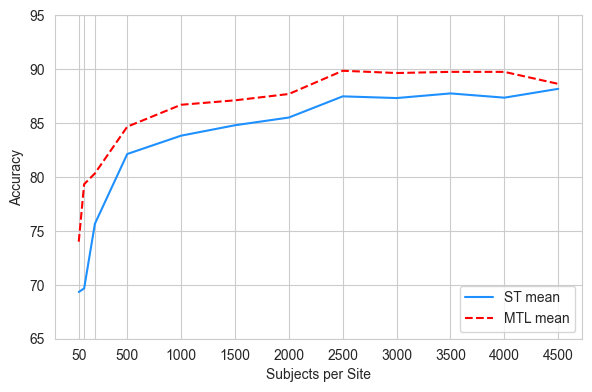

In [11]:
sns.set_style('whitegrid')
plt.figure(figsize=(6,4))
plt.plot(sample_sizes,sex_st_mean,label = 'ST mean',color='dodgerblue')
plt.plot(sample_sizes,sex_mtl_mean,label = 'MTL mean',color='red',ls='--')
plt.legend(loc='lower right')
#plt.title('UKBB Sex - Single vs Multi-Task - MLPconn')
plt.xticks(sample_sizes,labels=[50,None,None,500,1000,1500,2000,2500,3000,3500,4000,4500])
plt.ylabel('Accuracy')
plt.xlabel('Subjects per Site')
plt.ylim(65,95)
plt.tight_layout(pad=1)
plt.savefig('../results_paper/sex/figures/st_vs_mtl_sex_ukbb.png',dpi=300)

# Age

In [12]:
age_tables = []
for k in sample_sizes:
    #############
    # LOAD DATA #
    #############

    # Single Task
    st_data = []
    for site in sites:
        folds = []
        for fold in range(5):
            p_parent = os.path.join(p_age, f"single/{k}/{site}/fold_{fold}")
            file = [f for f in os.listdir(p_parent) if f[-4:]=='.csv'][0]
            folds.append(pd.read_csv(os.path.join(p_parent,file),index_col=0,header=[0,1])[site])
        st_data.append(folds)

    st_data = dict(zip(sites,st_data))

    # Multi-task
    mtl_data = []
    for fold in range(5):
        p_parent = os.path.join(p_age, f"mtl/{k}/fold_{fold}")
        file = [f for f in os.listdir(p_parent) if f[-4:]=='.csv'][0]
        mtl_data.append(pd.read_csv(os.path.join(p_parent,file),index_col=0,header=[0,1]))

    ################
    # GET LOSS #
    ################

    # Single Task
    st_acc = []
    st_acc_std = []
    for site in sites:
        # Connectomes
        vals = [st_data[site][fold]['Loss/test'].iloc[-1] for fold in range(5)]
        st_acc.append(np.mean(vals))
        st_acc_std.append(np.std(vals))

    st_acc = pd.Series(st_acc,index=sites)
    st_acc_std = pd.Series(st_acc_std,index=sites)

    # Multi-task
    mtl_acc = []
    for fold in range(5):
        df = mtl_data[fold].transpose().reset_index()
        df = df[df['level_1']=='Loss/test'].set_index('level_0')[99]
        mtl_acc.append(df)
        
    mtl_acc_std = pd.concat(mtl_acc,axis=1).std(axis=1)
    mtl_acc = pd.concat(mtl_acc,axis=1).mean(axis=1)

    #########
    # TABLE #
    #########

    df = pd.concat([st_acc,mtl_acc,st_acc_std,mtl_acc_std],axis=1)
    df.columns = ['ST','MTL','ST_std','MTL_std']
    df['diff'] = df['MTL'] - df['ST']
    
    age_tables.append(df)

In [13]:
age_st_mean = [age_tables[i].mean()['ST'] for i in range(len(sample_sizes))]
age_mtl_mean = [age_tables[i].mean()['MTL'] for i in range(len(sample_sizes))]

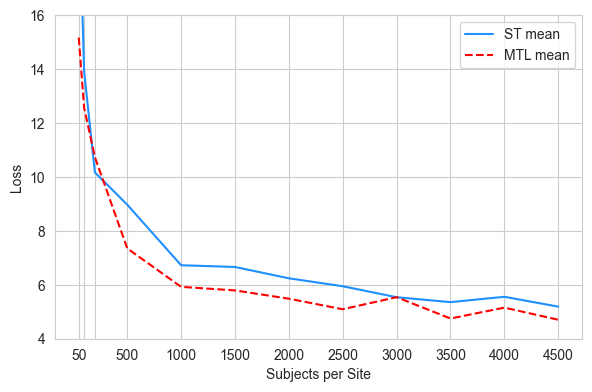

In [14]:
plt.figure(figsize=(6,4))
plt.plot(sample_sizes,age_st_mean,label = 'ST mean',color='dodgerblue')
plt.plot(sample_sizes,age_mtl_mean,label = 'MTL mean',color='red',ls='--')
plt.legend()
#plt.title('UKBB Age - Single vs Multi-Task - MLPconn_reg')
plt.xticks(sample_sizes,labels=[50,None,None,500,1000,1500,2000,2500,3000,3500,4000,4500])
plt.ylabel('Loss')
plt.xlabel('Subjects per Site')
plt.ylim(4,16)
plt.tight_layout(pad=1)
plt.savefig('../results_paper/age/figures/st_vs_mtl_age_ukbb.png',dpi=300)

# V2 - plot individual site accuracy

# SEX

In [10]:
sex_st_11025 = []
sex_st_11026 = []
sex_st_11027 = []
for k in sample_sizes:
    # Single Task
    folds_11025 = []
    folds_11026 = []
    folds_11027 = []
    for fold in range(5):
        p_parent_11025 = os.path.join(p_sex, f"single/{k}/UKBB11025/fold_{fold}")
        files_11025 = [f for f in os.listdir(p_parent_11025) if f[-4:]=='.csv']
        if len(files_11025) != 0:
            file = files_11025[0]
            acc_11025 = pd.read_csv(os.path.join(p_parent_11025,file),index_col=0,header=[0,1])['UKBB11025']['Accuracy/test'].loc[99]
            folds_11025.append(acc_11025)
        else:
            print(f'{k} fold {fold}')
        
        p_parent_11026 = os.path.join(p_sex, f"single/{k}/UKBB11026/fold_{fold}")
        files_11026 = [f for f in os.listdir(p_parent_11026) if f[-4:]=='.csv']
        if len(files_11026) != 0:
            file = files_11026[0]
            acc_11026 = pd.read_csv(os.path.join(p_parent_11026,file),index_col=0,header=[0,1])['UKBB11026']['Accuracy/test'].loc[99]
            folds_11026.append(acc_11026)
        else:
            print(f'{k} fold {fold}')
        
        p_parent_11027 = os.path.join(p_sex, f"single/{k}/UKBB11027/fold_{fold}")
        files_11027 = [f for f in os.listdir(p_parent_11027) if f[-4:]=='.csv']
        if len(files_11027) != 0:
            file = files_11027[0]
            acc_11027 = pd.read_csv(os.path.join(p_parent_11027,file),index_col=0,header=[0,1])['UKBB11027']['Accuracy/test'].loc[99]
            folds_11027.append(acc_11027)
        else:
            print(f'{k} fold {fold}')
    
    sex_st_11025.append((np.mean(folds_11025), np.std(folds_11025)))
    sex_st_11026.append((np.mean(folds_11026), np.std(folds_11026)))
    sex_st_11027.append((np.mean(folds_11027), np.std(folds_11027)))

In [11]:
df_st_sex_11025 = pd.DataFrame(sex_st_11025,columns=['UKBB11025','UKBB11025_STD'])
df_st_sex_11025['st_sample'] = sample_sizes
df_st_sex_11025

,UKBB11025,UKBB11025_STD,st_sample
0,60.000000,12.649111,50
1,59.000000,7.348469,100
2,78.500000,3.391165,200
3,82.400000,4.586938,500
4,86.000000,2.683282,1000
5,83.466667,1.343296,1500
6,84.750000,1.968502,2000
7,86.240000,1.438888,2500
8,86.700000,1.082179,3000
9,86.657143,1.870501,3500


In [12]:
df_st_sex_11026 = pd.DataFrame(sex_st_11026,columns=['UKBB11026','UKBB11026_STD'])
df_st_sex_11026['st_sample'] = sample_sizes
df_st_sex_11026

,UKBB11026,UKBB11026_STD,st_sample
0,74.000000,10.198039,50
1,75.000000,10.000000,100
2,73.500000,3.391165,200
3,84.600000,3.555278,500
4,82.700000,3.854867,1000
5,84.933333,2.101851,1500
6,84.650000,1.157584,2000
7,88.200000,1.283745,2500
8,86.866667,0.498888,3000
9,88.171429,0.815162,3500


In [13]:
df_st_sex_11027 = pd.DataFrame(sex_st_11027,columns=['UKBB11027','UKBB11027_STD'])
df_st_sex_11027['st_sample'] = sample_sizes
df_st_sex_11027

,UKBB11027,UKBB11027_STD,st_sample
0,74.000000,10.198039,50
1,75.000000,13.038405,100
2,75.000000,8.944272,200
3,79.400000,2.244994,500
4,82.800000,3.385262,1000
5,86.000000,1.414214,1500
6,87.150000,1.146734,2000
7,88.000000,0.565685,2500
8,88.400000,1.809236,3000
9,88.428571,1.382101,3500


In [14]:
mtl_sex_11025 = []
mtl_sex_11026 = []
mtl_sex_11027 = []
for k in sample_sizes:
    # Multi-task
    folds_11025 = []
    folds_11026 = []
    folds_11027 = []
    for fold in range(5):
        p_parent = os.path.join(p_sex, f"mtl/{k}/fold_{fold}")
        file = [f for f in os.listdir(p_parent) if f[-4:]=='.csv'][0]
        data = pd.read_csv(os.path.join(p_parent,file),index_col=0,header=[0,1])

        
        folds_11025.append(data['UKBB11025']['Accuracy/test'].loc[99])
        folds_11026.append(data['UKBB11026']['Accuracy/test'].loc[99])
        folds_11027.append(data['UKBB11027']['Accuracy/test'].loc[99])

    # Get accuracy
    acc_11025 = np.mean(folds_11025)
    acc_11026 = np.mean(folds_11026)
    acc_11027 = np.mean(folds_11027)

    std_11025 = np.std(folds_11025)
    std_11026 = np.std(folds_11026)
    std_11027 = np.std(folds_11027)
        
    mtl_sex_11025.append((acc_11025, std_11025))
    mtl_sex_11026.append((acc_11026, std_11026))
    mtl_sex_11027.append((acc_11027, std_11027))

In [15]:
df_mtl_sex_11025 = pd.DataFrame(mtl_sex_11025, columns = ['mtl_11025_acc','mtl_11025_std'])
df_mtl_sex_11026 = pd.DataFrame(mtl_sex_11026, columns = ['mtl_11026_acc','mtl_11026_std'])
df_mtl_sex_11027 = pd.DataFrame(mtl_sex_11027, columns = ['mtl_11027_acc','mtl_11027_std'])

In [27]:
st_mean_sex = np.mean([df_st_sex_11025['UKBB11025'].to_numpy(),
df_st_sex_11026['UKBB11026'].to_numpy(),df_st_sex_11027['UKBB11027'].to_numpy()],axis=0)

mtl_mean_sex = np.mean([df_mtl_sex_11025['mtl_11025_acc'].to_numpy(),
df_mtl_sex_11026['mtl_11026_acc'].to_numpy(),df_mtl_sex_11027['mtl_11027_acc'].to_numpy()],axis=0)

Text(0.5, 0, 'Subjects per site')

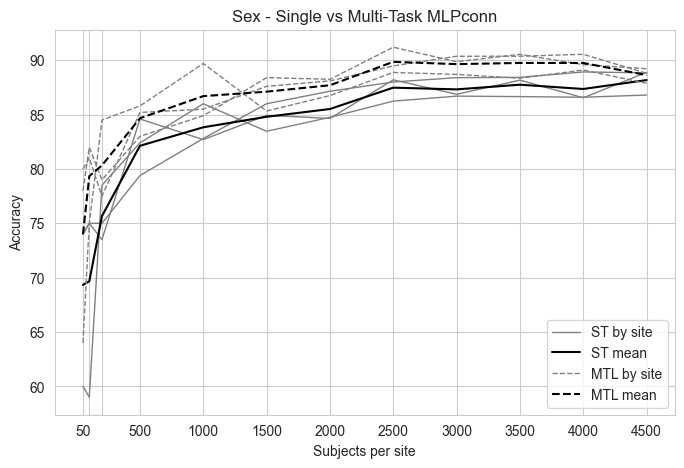

In [72]:
## V3
sns.set_style('whitegrid')
plt.figure(figsize=(8,5))
plt.plot(sample_sizes,df_st_sex_11025['UKBB11025'],color='gray',lw=1)
plt.plot(sample_sizes,df_st_sex_11026['UKBB11026'],color='gray',lw=1)
plt.plot(sample_sizes,df_st_sex_11027['UKBB11027'],color='gray',lw=1,label='ST by site')
plt.plot(sample_sizes,st_mean_sex,label='ST mean',color='black')

plt.plot(sample_sizes,df_mtl_sex_11025['mtl_11025_acc'],color='gray',lw=1,ls='--')
plt.plot(sample_sizes,df_mtl_sex_11026['mtl_11026_acc'],color='gray',lw=1,ls='--')
plt.plot(sample_sizes,df_mtl_sex_11027['mtl_11027_acc'],color='gray',lw=1,label='MTL by site',ls='--')
plt.plot(sample_sizes,mtl_mean_sex,label='MTL mean',color='black',ls='--')
plt.legend(loc='lower right')

plt.xticks(sample_sizes,labels=[50,None,None,500,1000,1500,2000,2500,3000,3500,4000,4500])
plt.title('Sex - Single vs Multi-Task MLPconn')
#plt.ylim(70,95)
plt.ylabel('Accuracy')
plt.xlabel('Subjects per site')

Text(0.5, 0, 'Subjects per site')

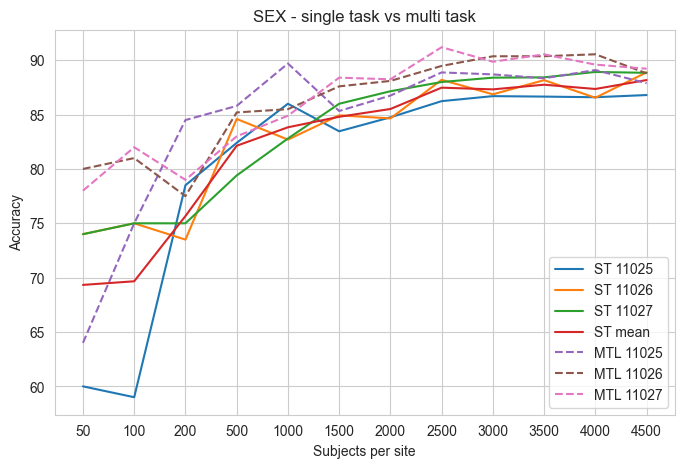

In [22]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,5))
plt.plot(df_st_sex_11025.index,df_st_sex_11025['UKBB11025'],label='ST 11025')
plt.plot(df_st_sex_11026.index,df_st_sex_11026['UKBB11026'],label='ST 11026')
plt.plot(df_st_sex_11027.index,df_st_sex_11027['UKBB11027'],label='ST 11027')

plt.plot(df_mtl_sex_11025.index,df_mtl_sex_11025['mtl_11025_acc'],label='MTL 11025',ls='--')
plt.plot(df_mtl_sex_11026.index,df_mtl_sex_11026['mtl_11026_acc'],label='MTL 11026',ls='--')
plt.plot(df_mtl_sex_11027.index,df_mtl_sex_11027['mtl_11027_acc'],label='MTL 11027',ls='--')
plt.legend()
plt.xticks(ticks=df_mtl_sex_11027.index,labels=sample_sizes)
plt.title('SEX - single task vs multi task')
plt.ylabel('Accuracy')
plt.xlabel('Subjects per site')

# AGE

In [38]:
age_st_11025 = []
age_st_11026 = []
age_st_11027 = []
for k in sample_sizes:
    # Single Task
    folds_11025 = []
    folds_11026 = []
    folds_11027 = []
    for fold in range(5):
        p_parent_11025 = os.path.join(p_age, f"single/{k}/UKBB11025/fold_{fold}")
        files_11025 = [f for f in os.listdir(p_parent_11025) if f[-4:]=='.csv']
        if len(files_11025) != 0:
            file = files_11025[0]
            loss_11025 = pd.read_csv(os.path.join(p_parent_11025,file),index_col=0,header=[0,1])['UKBB11025']['Loss/test'].loc[99]
            folds_11025.append(loss_11025)
        else:
            print(f'{k} fold {fold}')
        
        p_parent_11026 = os.path.join(p_age, f"single/{k}/UKBB11026/fold_{fold}")
        files_11026 = [f for f in os.listdir(p_parent_11026) if f[-4:]=='.csv']
        if len(files_11026) != 0:
            file = files_11026[0]
            loss_11026 = pd.read_csv(os.path.join(p_parent_11026,file),index_col=0,header=[0,1])['UKBB11026']['Loss/test'].loc[99]
            folds_11026.append(loss_11026)
        else:
            print(f'{k} fold {fold}')
        
        p_parent_11027 = os.path.join(p_age, f"single/{k}/UKBB11027/fold_{fold}")
        files_11027 = [f for f in os.listdir(p_parent_11027) if f[-4:]=='.csv']
        if len(files_11027) != 0:
            file = files_11027[0]
            loss_11027 = pd.read_csv(os.path.join(p_parent_11027,file),index_col=0,header=[0,1])['UKBB11027']['Loss/test'].loc[99]
            folds_11027.append(loss_11027)
        else:
            print(f'{k} fold {fold}')
    
    age_st_11025.append((np.mean(folds_11025), np.std(folds_11025)))
    age_st_11026.append((np.mean(folds_11026), np.std(folds_11026)))
    age_st_11027.append((np.mean(folds_11027), np.std(folds_11027)))

In [39]:
df_st_age_11025 = pd.DataFrame(age_st_11025,columns=['UKBB11025','UKBB11025_STD'])
df_st_age_11025['st_sample'] = sample_sizes
df_st_age_11025

,UKBB11025,UKBB11025_STD,st_sample
0,26.542855,7.993801,50
1,13.300474,2.842975,100
2,10.879014,2.941258,200
3,9.119675,2.705613,500
4,6.667464,0.940909,1000
5,6.379054,0.802609,1500
6,6.466006,0.809964,2000
7,6.130735,0.667473,2500
8,5.101958,0.268657,3000
9,5.328655,0.489322,3500


In [40]:
df_st_age_11026 = pd.DataFrame(age_st_11026,columns=['UKBB11026','UKBB11026_STD'])
df_st_age_11026['st_sample'] = sample_sizes
df_st_age_11026

,UKBB11026,UKBB11026_STD,st_sample
0,19.304877,9.506195,50
1,13.091868,2.799054,100
2,10.790592,1.950298,200
3,8.976409,1.060351,500
4,7.163289,1.299010,1000
5,6.533222,0.774128,1500
6,6.673332,0.787987,2000
7,5.588664,0.386124,2500
8,5.505605,0.301804,3000
9,5.675685,0.453125,3500


In [41]:
df_st_age_11027 = pd.DataFrame(age_st_11027,columns=['UKBB11027','UKBB11027_STD'])
df_st_age_11027['st_sample'] = sample_sizes
df_st_age_11027

,UKBB11027,UKBB11027_STD,st_sample
0,16.248565,4.818057,50
1,15.331491,2.777744,100
2,8.840418,0.781193,200
3,8.822088,0.778052,500
4,6.348139,0.512229,1000
5,7.072446,1.448063,1500
6,5.585153,0.408964,2000
7,6.122140,1.467331,2500
8,6.010933,0.948093,3000
9,5.067977,0.485827,3500


In [42]:
mtl_age_11025 = []
mtl_age_11026 = []
mtl_age_11027 = []
for k in sample_sizes:
    # Multi-task
    folds_11025 = []
    folds_11026 = []
    folds_11027 = []
    for fold in range(5):
        p_parent = os.path.join(p_age, f"mtl/{k}/fold_{fold}")
        file = [f for f in os.listdir(p_parent) if f[-4:]=='.csv'][0]
        data = pd.read_csv(os.path.join(p_parent,file),index_col=0,header=[0,1])

        
        folds_11025.append(data['UKBB11025']['Loss/test'].loc[99])
        folds_11026.append(data['UKBB11026']['Loss/test'].loc[99])
        folds_11027.append(data['UKBB11027']['Loss/test'].loc[99])

    # Get accuracy
    loss_11025 = np.mean(folds_11025)
    loss_11026 = np.mean(folds_11026)
    loss_11027 = np.mean(folds_11027)

    std_11025 = np.std(folds_11025)
    std_11026 = np.std(folds_11026)
    std_11027 = np.std(folds_11027)
        
    mtl_age_11025.append((loss_11025, std_11025))
    mtl_age_11026.append((loss_11026, std_11026))
    mtl_age_11027.append((loss_11027, std_11027))

In [43]:
df_mtl_age_11025 = pd.DataFrame(mtl_age_11025, columns = ['mtl_11025_loss','mtl_11025_std'])
df_mtl_age_11026 = pd.DataFrame(mtl_age_11026, columns = ['mtl_11026_loss','mtl_11026_std'])
df_mtl_age_11027 = pd.DataFrame(mtl_age_11027, columns = ['mtl_11027_loss','mtl_11027_std'])

In [45]:
st_mean_age = np.mean([df_st_age_11025['UKBB11025'].to_numpy(),
df_st_age_11026['UKBB11026'].to_numpy(),df_st_age_11027['UKBB11027'].to_numpy()],axis=0)

mtl_mean_age = np.mean([df_mtl_age_11025['mtl_11025_loss'].to_numpy(),
df_mtl_age_11026['mtl_11026_loss'].to_numpy(),df_mtl_age_11027['mtl_11027_loss'].to_numpy()],axis=0)

Text(0.5, 0, 'Subjects per site')

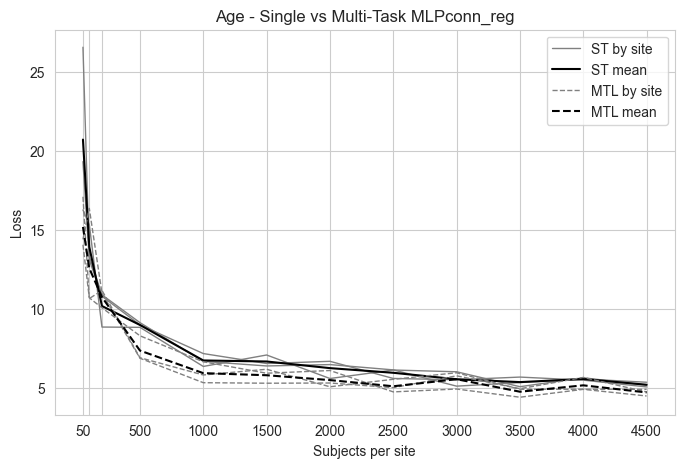

In [75]:
## V3
sns.set_style('whitegrid')
plt.figure(figsize=(8,5))
plt.plot(sample_sizes,df_st_age_11025['UKBB11025'],color='gray',lw=1)
plt.plot(sample_sizes,df_st_age_11026['UKBB11026'],color='gray',lw=1)
plt.plot(sample_sizes,df_st_age_11027['UKBB11027'],color='gray',lw=1,label='ST by site')
plt.plot(sample_sizes,st_mean_age,label='ST mean',color='black')

plt.plot(sample_sizes,df_mtl_age_11025['mtl_11025_loss'],color='gray',lw=1,ls='--')
plt.plot(sample_sizes,df_mtl_age_11026['mtl_11026_loss'],color='gray',lw=1,ls='--')
plt.plot(sample_sizes,df_mtl_age_11027['mtl_11027_loss'],color='gray',lw=1,label='MTL by site',ls='--')
plt.plot(sample_sizes,mtl_mean_age,label='MTL mean',color='black',ls='--')
plt.legend(loc='upper right')
plt.xticks(sample_sizes,labels=[50,None,None,500,1000,1500,2000,2500,3000,3500,4000,4500])
plt.title('Age - Single vs Multi-Task MLPconn_reg')
plt.ylabel('Loss')
#plt.ylim(4,10)
plt.xlabel('Subjects per site')

Text(0.5, 0, 'Subjects per site')

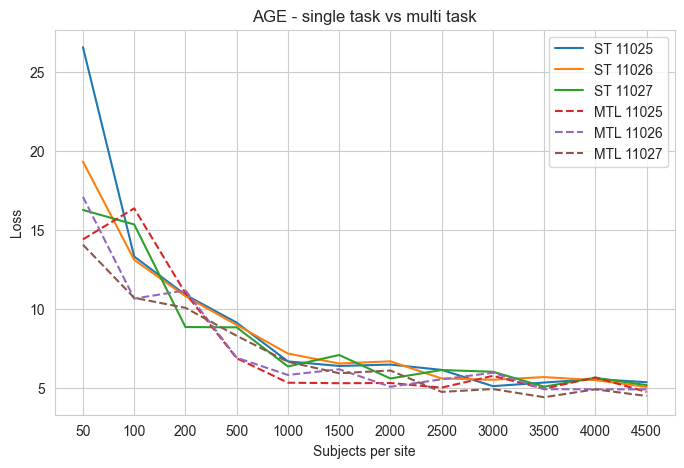

In [26]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,5))
plt.plot(df_st_age_11025.index,df_st_age_11025['UKBB11025'],label='ST 11025')
plt.plot(df_st_age_11026.index,df_st_age_11026['UKBB11026'],label='ST 11026')
plt.plot(df_st_age_11027.index,df_st_age_11027['UKBB11027'],label='ST 11027')

plt.plot(df_mtl_age_11025.index,df_mtl_age_11025['mtl_11025_loss'],label='MTL 11025',ls='--')
plt.plot(df_mtl_age_11026.index,df_mtl_age_11026['mtl_11026_loss'],label='MTL 11026',ls='--')
plt.plot(df_mtl_age_11027.index,df_mtl_age_11027['mtl_11027_loss'],label='MTL 11027',ls='--')
plt.legend()
plt.xticks(ticks=df_mtl_age_11027.index,labels=sample_sizes)
plt.title('AGE - single task vs multi task')
plt.ylabel('Loss')
plt.xlabel('Subjects per site')